In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [98]:
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


In [99]:
# Khai báo 
vocab_size = 10000
max_leng = 140

In [100]:
imdb, info = tfds.load("imdb_reviews" ,with_info=True ,as_supervised=True)

In [101]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [102]:
train, test = imdb["train"], imdb["test"]

In [103]:
train_sequences = []
train_labels = []

test_sequences = []
test_labels = []

for s, l in train:
  train_sequences.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s, l in test:
  test_sequences.append((str(s.numpy())))
  test_labels.append(l.numpy())


In [104]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [105]:
train_sequences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [106]:
train_labels[0]

0

In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [108]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sequences)

In [ ]:
index_word = tokenizer.index_word
index_word

In [124]:
trained_sequences = tokenizer.texts_to_sequences(train_sequences)


In [111]:
tested_sequences = tokenizer.texts_to_sequences(test_sequences)

In [112]:
# Check lib
new_sequences = ["This is impossible, nothing in my life",
                 "I'm the best of AI area in the worlds "]

In [113]:
new_sequences = tokenizer.texts_to_sequences(new_sequences)
new_sequences

[[12, 7, 1182, 163, 9, 63, 113], [319, 2, 120, 5, 1, 1632, 9, 2, 3309]]

In [125]:
# Padding
padded_train_sequences = pad_sequences(trained_sequences, maxlen=max_leng, padding="post", truncating="post")
padded_test_sequences.shape

(25000, 140)

In [115]:
padded_test_sequences = pad_sequences(tested_sequences, maxlen=max_leng, padding="post", truncating="post")

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [139]:
def build_model():
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_leng))
  model.add(Flatten())
  # model.add(Dense(128, activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))

  model.summary()
  return model

In [140]:
model = build_model()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 140, 64)           640000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 8960)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                573504    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 1,213,569
Trainable params: 1,213,569
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [142]:
H = model.fit(padded_train_sequences, train_labels, validation_data=[padded_test_sequences ,test_labels], epochs=10)

Epoch 1/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4367 - acc: 0.7852 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 0.1098 - acc: 0.9610 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0126 - acc: 0.9974 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 1.7788e-04 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 8.6868e-05 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 5.3071e-05 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
E

In [143]:
import matplotlib.pyplot as plt


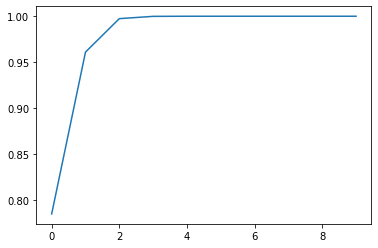

In [150]:
plt.plot(H.history["acc"])
plt.plot(H.history[])
plt.show()